# Proyek Belajar Pengembangan Machine Learning: Proyek Analisis Sentimen Game Honor of Kings
- **Nama:** Muhammad Ferry Fernanda
- **Email:** feefeenan@gmail.com
- **ID Dicoding:** ferfernanda

# **Import Library**

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
import numpy as np  # NumPy untuk komputasi numerik
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [ ]:
df = pd.read_csv('HOK_ReviewsUS_labeled.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   content                15394 non-null  object
 1   preprocessing_content  15394 non-null  object
 2   score                  15394 non-null  int64 
 3   polarity_score         15394 non-null  int64 
 4   polarity               15394 non-null  object
 5   text_length            15394 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 721.7+ KB


In [ ]:
df.polarity.value_counts()

polarity
positive    10748
negative     3660
neutral       986
Name: count, dtype: int64

In [ ]:
df.dropna(inplace = True)

#EDA

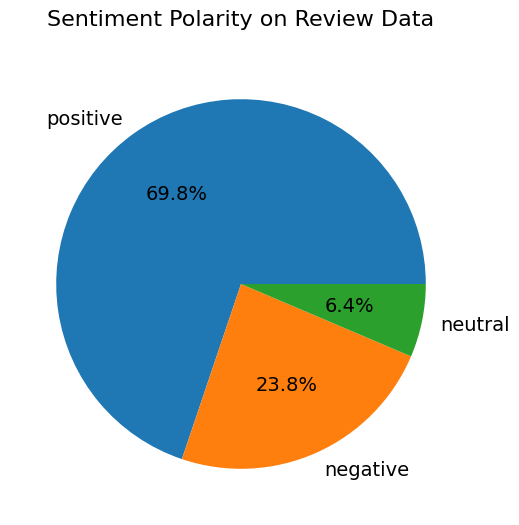

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
from wordcloud import WordCloud

# Menggabungkan semua teks
all_text = ' '.join(df['preprocessing_content'])

# Menggabungkan teks polarity positif, netral, dan negatif
positive = ' '.join(df[df['polarity'] == 'positive']['preprocessing_content'])
neutral = ' '.join(df[df['polarity'] == 'neutral']['preprocessing_content'])
negative = ' '.join(df[df['polarity'] == 'negative']['preprocessing_content'])

# Membuat word cloud untuk semua teks
wordcloud_all = WordCloud(width=600, height=300, background_color='white').generate(all_text)
wordcloud_positive = WordCloud(width=600, height=300, background_color='white').generate(positive)
wordcloud_neutral = WordCloud(width=600, height=300, background_color='white').generate(neutral)
wordcloud_negative = WordCloud(width=600, height=300, background_color='white').generate(negative)


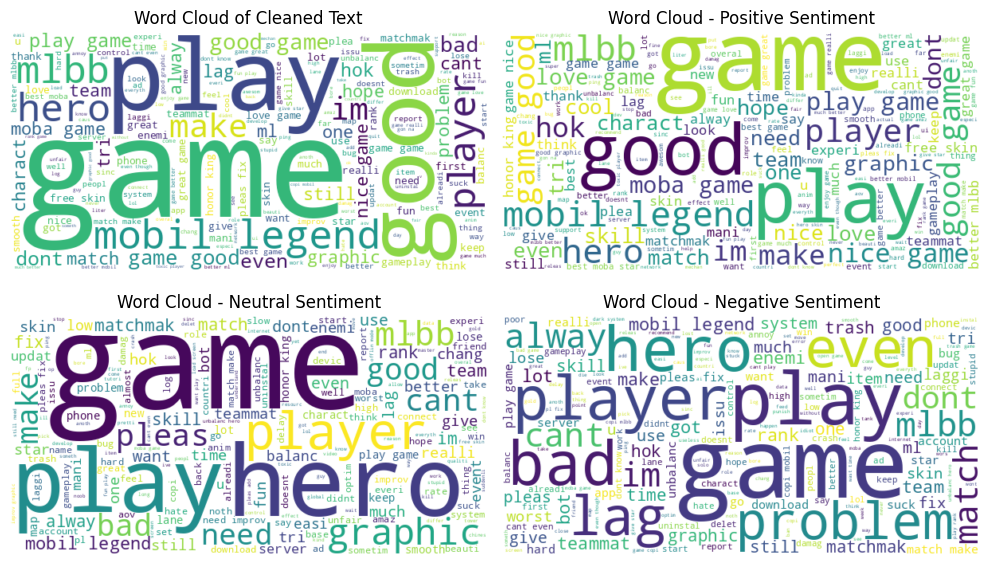

In [ ]:
# Menampilkan word cloud dalam subplot
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud of Cleaned Text')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiment')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud - Neutral Sentiment')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

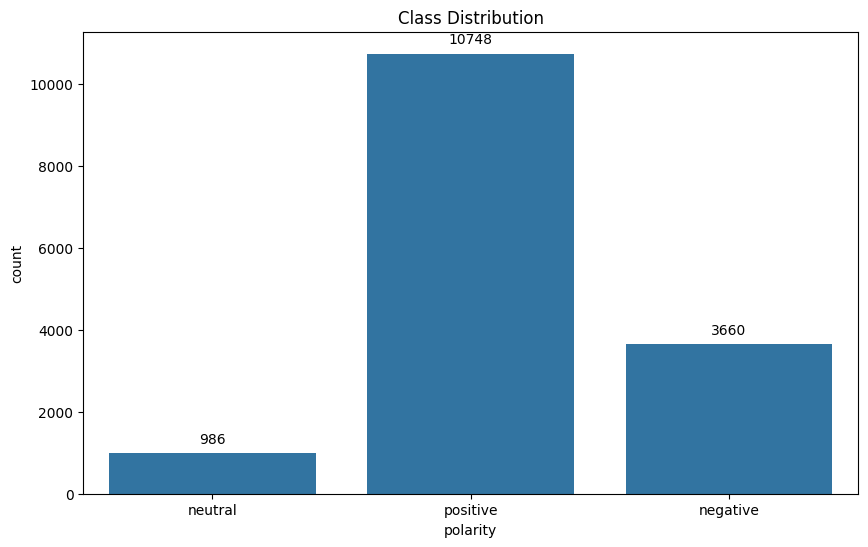

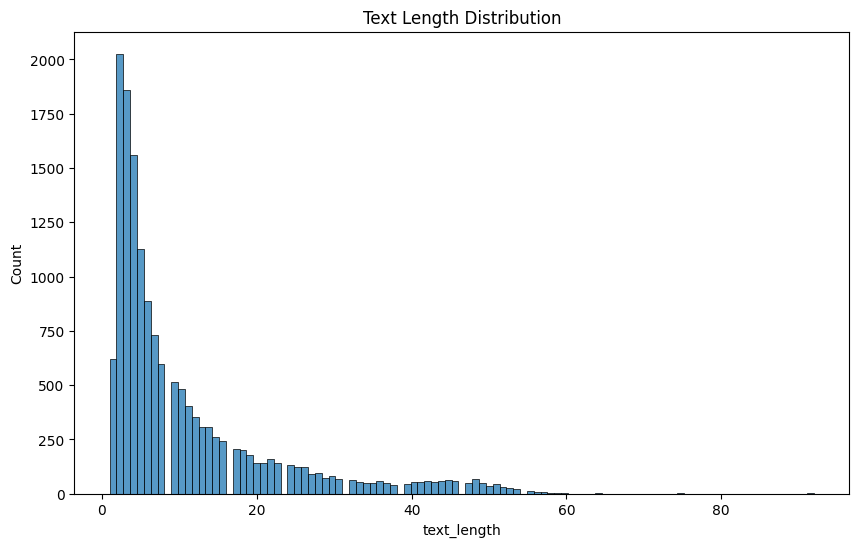

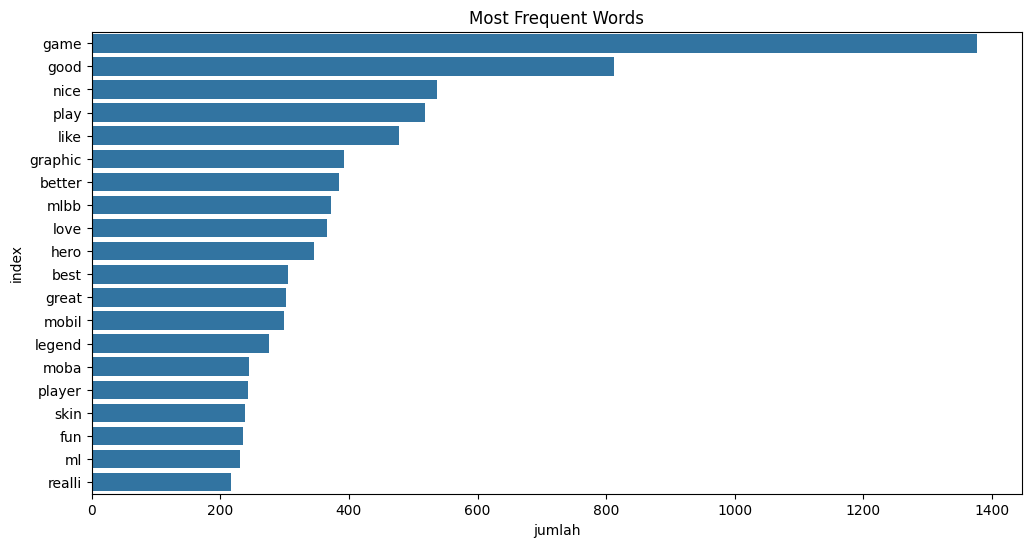

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
df['text_length'] = df['preprocessing_content'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessing_content'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# **Data Splitting TF-IDF**

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df['preprocessing_content']
y = LabelEncoder().fit_transform(df['polarity'])

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,abil,abl,absolut,acc,access,account,action,actual,ad,add,...,yall,ye,yeah,year,yet,yi,youll,your,youtub,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145688,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Data Splitting SMOTE

In [ ]:
# Check class distribution after SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution before SMOTE:
2    8605
0    2927
1     783
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
0    8605
2    8605
1    8605
Name: count, dtype: int64


In [ ]:
X_train_smote.shape, X_test.shape, y_train_smote.shape, y_test.shape

((25815, 983), (3079, 983), (25815,), (3079,))

# Data Splitting Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X_vectorizer = CountVectorizer().fit_transform(df['preprocessing_content'])
y_vectorizer = df['polarity']

In [ ]:
X_train_vectorizer, X_test_vectorizer, y_train_vectorizer, y_test_vectorizer = train_test_split(X_vectorizer, y_vectorizer, test_size=0.3, random_state=42)

In [ ]:
X_train_vectorizer.shape, X_test_vectorizer.shape, y_train_vectorizer.shape, y_test_vectorizer.shape

((10775, 8673), (4619, 8673), (10775,), (4619,))

# Model Fit

In [ ]:
# Function untuk training model
def fit_eval(model_name, X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))
    print("\n")

# Definisikan model machine learning yang akan digunakan
models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier()
}

# Definisikan grid parameter untuk tuning masing-masing model
param_grids = {
    "LogisticRegression": {'penalty': ['l1', 'l2', 'elasticnet'],'C': [1, 10, 100], 'solver': ['liblinear']},
    "SVM": {'C': [1, 10], 'gamma': ['scale', 'auto']},
    "RandomForest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
    }

# Scheme 1, TF-IDF 80:20

In [ ]:
# Evaluasi dengan TF-IDF
print("=== Evaluasi dengan TF-IDF ===")
best_models_tfidf = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models_tfidf[model_name] = best_model

    fit_eval(model_name, X_train, y_train, X_test, y_test, best_model)
    print(f"Best parameters: {grid_search.best_params_}")
    print("\n")

=== Evaluasi dengan TF-IDF ===
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: LogisticRegression
Train Accuracy: 0.943483556638246
Test Accuracy: 0.8999675219227021
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       733
           1       0.50      0.19      0.27       203
           2       0.93      0.97      0.95      2143

    accuracy                           0.90      3079
   macro avg       0.76      0.68      0.70      3079
weighted avg       0.88      0.90      0.89      3079



Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model: SVM
Train Accuracy: 0.9857084855866829
Test Accuracy: 0.8905488795063332
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       733
           1       0.45      0.17      0.25       203
           2  

# Scheme 2, TF-IDF SMOTE 80:20

In [ ]:
# Evaluasi dengan TF-IDF
print("=== Evaluasi dengan TF-IDF SMOTE===")
best_models_tfidf = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=1)
    grid_search.fit(X_train_smote, y_train_smote)

    best_model = grid_search.best_estimator_
    best_models_tfidf[model_name] = best_model

    fit_eval(model_name, X_train_smote, y_train_smote, X_test, y_test, best_model)
    print(f"Best parameters: {grid_search.best_params_}")
    print("\n")

=== Evaluasi dengan TF-IDF SMOTE===
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: LogisticRegression
Train Accuracy: 0.9327910129769514
Test Accuracy: 0.8639168561221175
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       733
           1       0.30      0.44      0.35       203
           2       0.95      0.92      0.93      2143

    accuracy                           0.86      3079
   macro avg       0.70      0.73      0.71      3079
weighted avg       0.88      0.86      0.87      3079



Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model: SVM
Train Accuracy: 0.9668409839240751
Test Accuracy: 0.8746346216303995
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       733
           1       0.31      0.21      0.25       203
       

# Scheme 3, Count Vectorizer 70:30

In [ ]:
# Evaluasi dengan Count Venctorizer
print("=== Evaluasi dengan Count Venctorizer===")
best_models_tfidf = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=1)
    grid_search.fit(X_train_vectorizer, y_train_vectorizer)

    best_model = grid_search.best_estimator_
    best_models_tfidf[model_name] = best_model

    fit_eval(model_name, X_train_vectorizer, y_train_vectorizer, X_test_vectorizer, y_test_vectorizer, best_model)
    print(f"Best parameters: {grid_search.best_params_}")
    print("\n")

=== Evaluasi dengan Count Venctorizer===
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: LogisticRegression
Train Accuracy: 0.9323433874709977
Test Accuracy: 0.8969473912102187
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.90      0.88      1112
     neutral       0.49      0.08      0.14       306
    positive       0.92      0.97      0.94      3201

    accuracy                           0.90      4619
   macro avg       0.75      0.65      0.65      4619
weighted avg       0.87      0.90      0.87      4619



Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model: SVM
Train Accuracy: 0.9894199535962876
Test Accuracy: 0.8616583676120373
Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.76      0.79      1112
     neutral       0.41      0.18      0.25       306
    

# Scheme 4, Count Vectorizer SMOTE 70:30

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote_vectorizer, y_train_smote_vectorizer = smote.fit_resample(X_train_vectorizer, y_train_vectorizer)

In [ ]:
print(pd.Series(y_train_smote_vectorizer).value_counts())

polarity
negative    7547
neutral     7547
positive    7547
Name: count, dtype: int64


In [ ]:
# Evaluasi dengan Count Vectorizer SMOTE
print("=== Evaluasi dengan Count Vectorizer SMOTE===")
best_models_tfidf = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models_tfidf[model_name] = best_model

    fit_eval(model_name, X_train_smote_vectorizer, y_train_smote_vectorizer, X_test_vectorizer, y_test_vectorizer, best_model)
    print(f"Best parameters: {grid_search.best_params_}")
    print("\n")

=== Evaluasi dengan Count Vectorizer SMOTE===
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: LogisticRegression
Train Accuracy: 0.8896250165628726
Test Accuracy: 0.8233383849318034
Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79      1112
     neutral       0.22      0.36      0.28       306
    positive       0.94      0.88      0.91      3201

    accuracy                           0.82      4619
   macro avg       0.65      0.68      0.66      4619
weighted avg       0.85      0.82      0.84      4619



Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}




# Best Model

In [ ]:
model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Model: LogisticRegression")
print(f"Parameter: C=10, penalty=l1, solver=liblinear\n")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}\n")

print("Classification Report:")
print(classification_report(y_test, model.predict(X_test), target_names=['Negative', 'Neutral', 'Positive']))

Model: LogisticRegression
Parameter: C=10, penalty=l1, solver=liblinear

Train Accuracy: 0.943483556638246
Test Accuracy: 0.8999675219227021

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87       733
     Neutral       0.50      0.19      0.27       203
    Positive       0.93      0.97      0.95      2143

    accuracy                           0.90      3079
   macro avg       0.76      0.68      0.70      3079
weighted avg       0.88      0.90      0.89      3079



In [ ]:
import pickle
with open('LogisticRegression.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
with open('TFIDF_Vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

# Testing

In [ ]:
with open('LogisticRegression.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

In [ ]:
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def cleaning(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'https?://\S+|www.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = text.lower()
    return text

def tokenizing(clean_text):
    return word_tokenize(clean_text)

def filtering(tokens):
    listStopwords = set(stopwords.words('english'))
    listStopwords.update(['game'])
    return [word for word in tokens if word not in listStopwords]

def stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_text = ' '.join([stemmer.stem(word) for word in tokens])
    return stemmed_text

def preprocessing_text(text):
    text = cleaning(text)
    tokens = tokenizing(text)
    tokens = filtering(tokens)
    texts = stemming(tokens)

    return texts

In [ ]:
  # Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = preprocessing_text(kalimat_baru)


# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_cleaned])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = model.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'neutral':
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: good but kinda lag
Sentimen kalimat baru adalah NEGATIF.
